In [1]:
from skimage.io import imread, imshow, imsave

In [2]:
img = imread('tiger-gray.png')

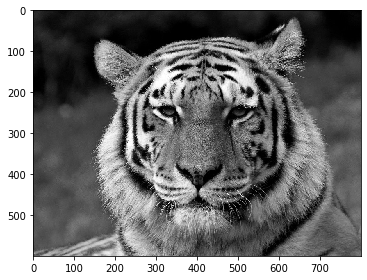

In [3]:
imshow(img);

In [4]:
img.shape

(600, 800)

Пусть у нас есть гауссовский фильтр.

In [5]:
import numpy as np

In [6]:
from scipy.signal.windows import gaussian

In [7]:
sigma = 4

In [8]:
n_points = 2 * round(sigma * 3) + 1

In [9]:
n_points

25

Функция outer() вычисляет внешнее произведение двух векторов.
Результат - двумерный массив NumPy

scipy.signal.windows.gaussian - Return a Gaussian window.
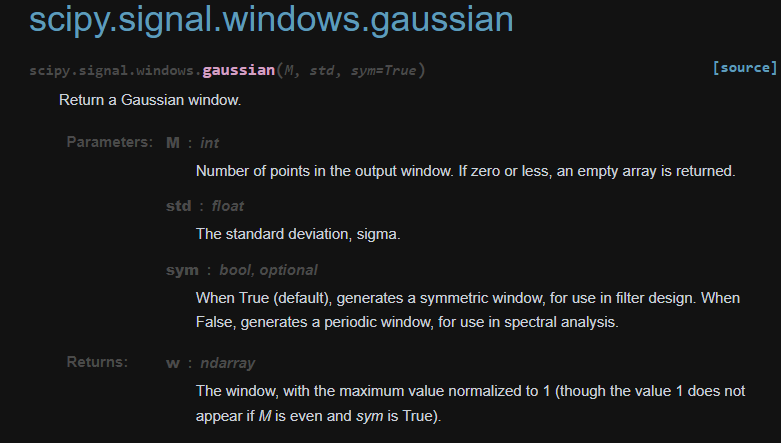
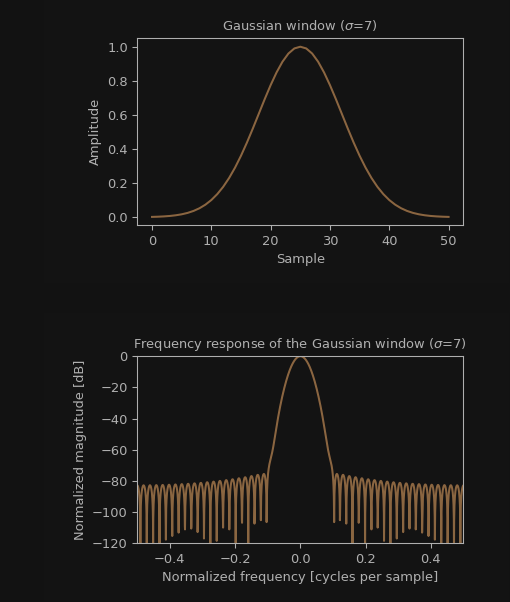

In [10]:
kernel = np.outer(gaussian(n_points, std=sigma), gaussian(n_points, std=sigma))

In [11]:
kernel = kernel / kernel.sum()

C:\Users\d-bug\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


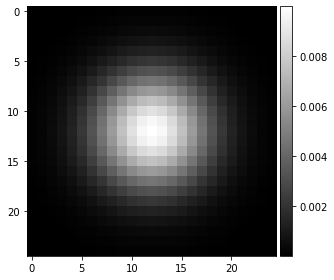

In [12]:
imshow(kernel, cmap='gray');

In [13]:
kernel.shape, kernel.min(), kernel.max()

((25, 25), 1.2318371756287736e-06, 0.009981680019227373)

Дополним гауссовский фильтр нулями так, чтобы по размеру он стал равен изображению тигра.

In [14]:
gauss = np.zeros((img.shape[0], img.shape[1]))

In [15]:
row = (img.shape[0] - kernel.shape[0]) // 2

In [16]:
col = (img.shape[1] - kernel.shape[1]) // 2

In [17]:
gauss[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]

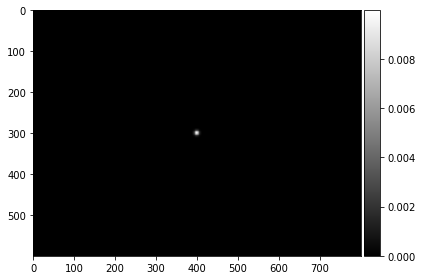

In [18]:
imshow(gauss, cmap='gray');

In [19]:
gauss.shape, gauss.min(), gauss.max()

((600, 800), 0.0, 0.009981680019227373)

Возьмём от изображения с тигром преобразование Фурье - получим карту частот изображения.

In [20]:
import scipy.fftpack as fp

scipy.fftpack.fft2

2-D discrete Fourier transform. Return the 2-D discrete Fourier transform of the 2-D argument x.

In [21]:
freq_img = fp.fft2(img)

In [22]:
freq_img.min(), freq_img.max(), freq_img.shape

((-4606396.006564305-2218798.484181928j), (42968117-0j), (600, 800))

scipy.fftpack.fftshift

Shift the zero-frequency component to the center of the spectrum.
This function swaps half-spaces for all axes listed (defaults to all). Note that y[0] is the Nyquist component only if len(x) is even.

C:\Users\d-bug\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


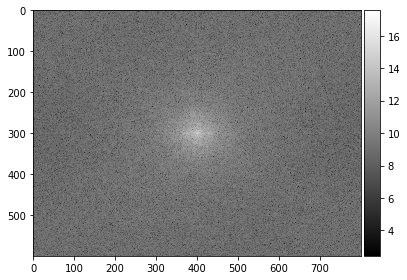

In [23]:
imshow(np.log(1 + np.abs(fp.fftshift(freq_img))), cmap='gray');

В центре этой карты коэффициенты при низких частотах, а на окраинах - при высоких.

Также возьмём преобразование Фурье от гауссовского фильтра - получим карту частот гауссовского фильтра.

scipy.fftpack.ifftshift

The inverse of fftshift. Although identical for even-length x, the functions differ by one sample for odd-length x.

Returns The shifted array.

In [24]:
freq_gauss = fp.fft2(fp.ifftshift(gauss))

In [25]:
freq_gauss.min(), freq_gauss.max(), freq_gauss.shape

((-0.0007065895510199176+2.862293735361732e-17j), (1-0j), (600, 800))

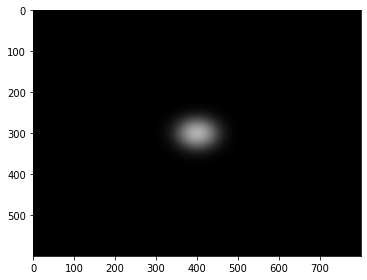

In [26]:
imshow(np.log(1 + np.abs(fp.fftshift(freq_gauss))), cmap='gray');

Видим, что результат преобразования Фурье от гауссовского фильтра тоже является гауссианой, т.е. гауссовский фильтр имеет только низкие частоты, а высокие частоты имеют коэффициенты близкие к нулю.

Если мы поэлементно перемножим коэффициенты при частотах в изображении тигра и коэффициенты при частотах в гауссовском фильтре, то мы получим ещё одну карту коэффициентов при частотах.

In [27]:
multiple = freq_img * freq_gauss

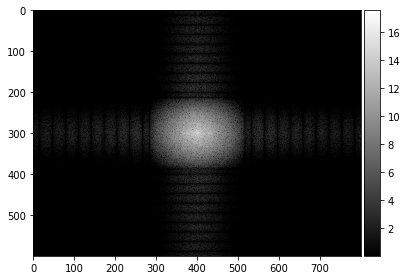

In [28]:
imshow(np.log(1 + np.abs(np.fft.fftshift(multiple))), cmap='gray');

Если к этой карте коэффициентов применить обратное преобразование Фурье, то мы получим размытое изображение тигра - так же, как если бы мы к исходному изображению тигра применили исходный гауссовский фильтр.

scipy.fftpack.ifft2 :

2-D discrete inverse Fourier transform of real or complex sequence.

Return inverse 2-D discrete Fourier transform of arbitrary type sequence x.

numpy.real : 

Функция real() возвращает действительную часть комплексного числа.

In [29]:
out_img = fp.ifft2(multiple).real

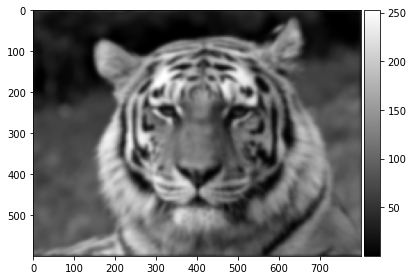

In [30]:
imshow(out_img, cmap='gray');